In [ ]:
import numpy as np 
def sgd_step(W, gradient, learning_rate):
    """
    Perform one SGD parameter update.
    
    Args:
        W: Current weights (any shape)
        gradient: Gradient of loss w.r.t. W (same shape as W)
        learning_rate: Step size
    
    Returns:
        W_new: Updated weights
    """
    # to check both infinite and NAN values np.isfinite(x)
    # how to discover NAN and infinite values 
    #detection 
    if np.isnan(gradient):
        print("warning: nan values are detected in gradient")
        print(f"Nan values are in {np.where(np.isnan(gradient))}")
        # to skip this computing 
        return W
    # detect infinte values
    if np.isinf(gradient):
        print("warning: infinite values are detected in gradient")
        print(f"infinte values are in {np.where(np.isinf(gradient))}")

        # skip this computing 
        return W 
    
    W_new = W - learning_rate*gradient

        # Check output too
    if np.isnan(W_new).any():
        print("WARNING: NaN in updated weights!")
        return W
    
    return W_new

What happens if gradient contains NaN values? How would you detect and handle this? 
if gradient contain NAN values the new wieghts would be NaN , I don't know how can I deetect them 

In [1]:
import numpy as np 
# One training example
x = np.array([2.0, 3.0])  # features
y = 5.0                    # true label
W = np.array([0.5, 0.5])   # current weights

# Loss: L = (prediction - y)^2
prediction = W.dot(x)
L = (prediction - y)**2


In [2]:
def compute_gradient_manual(x, y, W):
    """
    Compute gradient for one example.
    
    Args:
        x: features (D,)
        y: true label (scalar)
        W: weights (D,)
    
    Returns:
        loss: scalar
        gradient: same shape as W (D,)
    """
    # 1. Compute prediction
    prediction = np.dot(W, x)  # or W.dot(x)
    
    # 2. Compute loss
    loss = (prediction - y) ** 2
    
    # 3. Compute gradient using chain rule
    # dL/dW = 2 * (prediction - y) * x
    gradient = 2 * (prediction - y) * x
    
    return loss, gradient
    

In [3]:
x = np.array([2.0, 3.0])
y = 5.0
W = np.array([0.5, 0.5])

loss, grad = compute_gradient_manual(x, y, W)
print(f"Prediction: {W.dot(x)}")  # 0.5*2 + 0.5*3 = 2.5
print(f"Loss: {loss}")             # (2.5 - 5)^2 = 6.25
print(f"Gradient: {grad}")         # 2*(2.5-5)*[2,3] = [-10, -15]

Prediction: 2.5
Loss: 6.25
Gradient: [-10. -15.]


**Expected output:**
```
Prediction: 2.5
Loss: 6.25
Gradient: [-10. -15.]
Key insight: The gradient tells you: "decrease W[0] by 10 units and W[1] by 15 units to reduce loss fastest."

In [ ]:
import numpy as np 
def buggy_minibatch_gd(X, y, learning_rate=0.01, batch_size=32, epochs=10):
    N, D = X.shape
    W = np.ones(D)  # Initialize weights
    
    for epoch in range(epochs):
        # Process batches
        indices = np.random.permutation(N)
        for i in range(0, N, batch_size):
            # shuffle data 
            batch_idx = indices[i:i+batch_size]
            X_batch = X[batch_idx]
            y_batch = y[batch_idx]
            
            # Compute gradient
            predictions = X_batch.dot(W) 
            loss = np.mean((predictions - y_batch) ** 2)
            gradient = X_batch.T.dot(predictions - y_batch)/batch_size
            
            # Update
            W = W - learning_rate * gradient #third bug it should be a - not + 
    
    return W

In [2]:
import numpy as np
def get_batches(X, y, batch_size, shuffle=True):
    """
    Generate mini-batches from dataset.
    
    Args:
        X: Features (N, D)
        y: Labels (N,)
        batch_size: Size of each batch
        shuffle: Whether to shuffle data first
    
    Yields:
        (X_batch, y_batch) tuples
    """
    N = X.shape[0]
    
    # Step 1: Shuffle if requested
    if shuffle:
        indices = np.random.permutation(N)
    else:
        indices = np.arange(N)
    
    # Step 2: Loop through data in batch_size chunks
    for start_idx in range(0, N, batch_size):
        # TODO: Get end index (careful with last batch!)
        end_idx = min(start_idx + batch_size, N)
        
        # TODO: Get batch indices
        batch_indices = indices[start_idx:start_idx+batch_size]
        
        # TODO: Extract batches using indices
        X_batch = X[batch_indices]
        y_batch = y[batch_indices]
        
        # TODO: yield the batch
        yield (X_batch,y_batch)

In [3]:
import numpy as np 
# Test with small data
X_test = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y_test = np.array([1, 2, 3, 4, 5])

print("Testing batch generator:")
for i, (X_batch, y_batch) in enumerate(get_batches(X_test, y_test, batch_size=2)):
    print(f"Batch {i}: X shape = {X_batch.shape}, y shape = {y_batch.shape}")
    print(f"  X = {X_batch.flatten()}, y = {y_batch}")

Testing batch generator:
Batch 0: X shape = (2, 2), y shape = (2,)
  X = [ 9 10  1  2], y = [5 1]
Batch 1: X shape = (2, 2), y shape = (2,)
  X = [7 8 3 4], y = [4 2]
Batch 2: X shape = (1, 2), y shape = (1,)
  X = [5 6], y = [3]


In [ ]:
def has_converged(loss_history, patience=5, min_delta=1e-4):
    """
    Check if training has converged.
    
    Args:
        loss_history: List of loss values over time
        patience: Number of epochs to wait for improvement
        min_delta: Minimum change to qualify as improvement
    
    Returns:
        True if converged, False otherwise
    """
    # Edge case: Not enough history to check
    if len(loss_history) < patience + 1:
        return False  # Can't determine convergence yet
    
    # Step 1: Get the best (minimum) loss seen so far
    # Hint: Look at all losses EXCEPT the last 'patience' epochs
    best_loss = min(loss_history[:-patience])# TODO: min of loss_history[:-patience]
    
    # Step 2: Check if any recent loss improved beyond min_delta
    # Loop through the last 'patience' losses
    for recent_loss in loss_history[-patience:]:
        # TODO: Check if recent_loss improved by more than min_delta
        improvement = best_loss - recent_loss
        if improvement > min_delta:
            return False  # Still improving!
    
    # Step 3: No significant improvement found
    return True  # Converged!

#Edge cases: What if loss_history has only 2 values but patience=5?
#the training would end with no patience value 

In [ ]:
class GradientDescentOptimizer:
    def __init__(self, learning_rate=0.01, batch_size=32, mode='minibatch'):
        """
        Initialize the optimizer.
        
        Args:
            learning_rate: Step size for updates
            batch_size: Size of mini-batches (ignored if mode='batch' or 'sgd')
            mode: 'batch' (BGD), 'sgd' (SGD), or 'minibatch' (MBGD)
        """
        self.lr = learning_rate
        self.batch_size = batch_size
        self.mode = mode
        
        # Validate mode
        valid_modes = ['batch', 'sgd', 'minibatch']
        if mode not in valid_modes:
            raise ValueError(f"mode must be one of {valid_modes}")
        
        # Adjust batch_size based on mode
        if mode == 'sgd':
            self.batch_size = 1  # Override for SGD

    def step(self, params, gradients):
        """
        Perform one optimization step.
            
            Args:
                params: Current parameters (can be W, or dict of params)
                gradients: Gradients w.r.t. params (same structure as params)
            
            Returns:
                Updated parameters
        """
        if not np.isfinite(gradients):
            raise ValueError("nan values detected")
        updated_params = params - self.lr*gradients

        return updated_params

            

In [4]:
"""
Gradient Descent Optimizer - Clean, Flexible Design
Production-ready implementation with PyTorch-like API.

Course: CS231n - Advanced Implementation
"""

import numpy as np
from typing import Union, Tuple, Generator


class GradientDescentOptimizer:
    """
    Flexible gradient descent optimizer supporting BGD, SGD, and MBGD.
    
    Design Principles:
    1. Stateful configuration (set once, use everywhere)
    2. Separation of concerns (optimizer doesn't know about loss)
    3. PyTorch-like API (zero_grad, step, state_dict)
    4. Type flexibility (works with arrays or parameter dicts)
    
    Examples:
        # Mini-batch GD
        optimizer = GradientDescentOptimizer(lr=0.01, batch_size=32)
        
        # Stochastic GD
        optimizer = GradientDescentOptimizer(lr=0.001, mode='sgd')
        
        # Batch GD
        optimizer = GradientDescentOptimizer(lr=0.1, mode='batch')
    """
    
    def __init__(self, 
                 learning_rate: float = 0.01,
                 batch_size: int = 32,
                 mode: str = 'minibatch',
                 clip_grad: float = None):
        """
        Initialize optimizer.
        
        Args:
            learning_rate: Step size for parameter updates (α)
            batch_size: Number of samples per batch (for MBGD)
            mode: Optimization mode
                - 'batch': Full batch GD (uses all data)
                - 'sgd': Stochastic GD (batch_size=1)
                - 'minibatch': Mini-batch GD (uses batch_size)
            clip_grad: Optional gradient clipping threshold (prevents explosion)
        
        Raises:
            ValueError: If mode is invalid or learning_rate <= 0
        """
        # Validate inputs
        if learning_rate <= 0:
            raise ValueError(f"learning_rate must be positive, got {learning_rate}")
        
        valid_modes = ['batch', 'sgd', 'minibatch']
        if mode not in valid_modes:
            raise ValueError(f"mode must be one of {valid_modes}, got '{mode}'")
        
        # Store configuration
        self.lr = learning_rate
        self.mode = mode
        self.clip_grad = clip_grad
        
        # Adjust batch_size based on mode
        if mode == 'sgd':
            self.batch_size = 1
        elif mode == 'batch':
            self.batch_size = None  # Will use full dataset
        else:
            self.batch_size = batch_size
        
        # Tracking (for debugging/logging)
        self.step_count = 0
        self.grad_norms = []  # History of gradient magnitudes
    
    def step(self, 
             params: Union[np.ndarray, dict], 
             gradients: Union[np.ndarray, dict]) -> Union[np.ndarray, dict]:
        """
        Perform one optimization step (parameter update).
        
        This is the core operation: W_new = W_old - lr * grad
        
        Args:
            params: Current parameters
                - np.ndarray: Single weight matrix
                - dict: Multiple parameter groups (e.g., {'W1': ..., 'W2': ...})
            gradients: Gradients w.r.t. params (same structure)
        
        Returns:
            Updated parameters (same structure as input)
        
        Raises:
            ValueError: If gradients contain NaN/Inf
            TypeError: If params and gradients have mismatched types
        
        Examples:
            # Single parameter
            W_new = optimizer.step(W, grad)
            
            # Multiple parameters
            params = {'W1': W1, 'b1': b1, 'W2': W2}
            grads = {'W1': dW1, 'b1': db1, 'W2': dW2}
            params = optimizer.step(params, grads)
        """
        # Handle dict of parameters (multi-layer networks)
        if isinstance(params, dict): # isinstance is to check if params is a dict 
            if not isinstance(gradients, dict):
                raise TypeError("gradients must be dict when params is dict")
            
            updated = {}
            for key in params.keys():
                if key not in gradients:
                    raise KeyError(f"Missing gradient for parameter '{key}'")
                updated[key] = self._update_single(params[key], gradients[key])
            return updated
        
        # Handle single parameter
        return self._update_single(params, gradients)
    
    def _update_single(self, param: np.ndarray, grad: np.ndarray) -> np.ndarray:
        """Internal method to update a single parameter."""
        # Safety checks
        if not np.isfinite(grad).all():
            nan_count = np.isnan(grad).sum()
            inf_count = np.isinf(grad).sum()
            raise ValueError(
                f"Non-finite gradient detected! "
                f"NaN: {nan_count}, Inf: {inf_count}"
            )
        
        # Optional gradient clipping (prevents explosion)
        if self.clip_grad is not None:
            grad_norm = np.linalg.norm(grad)
            if grad_norm > self.clip_grad:
                grad = grad * (self.clip_grad / grad_norm)
                print(f"⚠️ Gradient clipped: {grad_norm:.4f} → {self.clip_grad:.4f}")
        
        # Track gradient statistics
        self.grad_norms.append(np.linalg.norm(grad))
        
        # Core update: W = W - α * ∇L
        updated_param = param - self.lr * grad
        
        self.step_count += 1
        return updated_param
    
    def zero_grad(self):
        """
        Reset accumulated gradients.
        
        In frameworks with automatic differentiation (PyTorch), gradients
        accumulate by default, so this clears them before the next backward pass.
        
        In our numpy implementation, this is a no-op (we don't accumulate),
        but we include it for API consistency with PyTorch.
        
        Usage:
            optimizer.zero_grad()  # Clear gradients
            loss = compute_loss()  # Forward pass
            grad = compute_grad()  # Backward pass
            optimizer.step(W, grad)  # Update
        """
        # No-op for numpy (gradients aren't accumulated)
        # But included for PyTorch API compatibility
        pass
    
    def get_batches(self, 
                    X: np.ndarray, 
                    y: np.ndarray, 
                    shuffle: bool = True) -> Generator[Tuple[np.ndarray, np.ndarray], None, None]:
        """
        Generate batches according to optimizer's mode.
        
        Args:
            X: Features (N, D)
            y: Labels (N,)
            shuffle: Whether to shuffle data (recommended for SGD/MBGD)
        
        Yields:
            (X_batch, y_batch) tuples
        
        Examples:
            # Automatically handles batching based on mode
            for X_batch, y_batch in optimizer.get_batches(X, y):
                loss, grad = compute_loss(X_batch, y_batch, W)
                W = optimizer.step(W, grad)
        """
        N = X.shape[0]
        
        # Batch mode: use entire dataset
        if self.mode == 'batch':
            yield X, y
            return
        
        # SGD/MBGD: use batches
        if shuffle:
            indices = np.random.permutation(N)
        else:
            indices = np.arange(N)
        
        for start in range(0, N, self.batch_size):
            batch_idx = indices[start:start + self.batch_size]
            yield X[batch_idx], y[batch_idx] #Memory efficient (don't load all batches at once)
    
    def state_dict(self) -> dict:
        """
        Get optimizer state (for saving/loading).
        
        Returns:
            Dictionary containing optimizer configuration and statistics
        
        Example:
            # Save optimizer state
            state = optimizer.state_dict()
            np.save('optimizer_state.npy', state)
            
            # Load optimizer state
            state = np.load('optimizer_state.npy', allow_pickle=True).item()
            optimizer = GradientDescentOptimizer(**state['config'])
        """
        return {
            'config': {
                'learning_rate': self.lr,
                'batch_size': self.batch_size,
                'mode': self.mode,
                'clip_grad': self.clip_grad
            },
            'statistics': {
                'step_count': self.step_count,
                'avg_grad_norm': np.mean(self.grad_norms) if self.grad_norms else 0.0,
                'max_grad_norm': np.max(self.grad_norms) if self.grad_norms else 0.0
            }
        }
    
    def __repr__(self) -> str:
        """String representation for debugging."""
        return (f"GradientDescentOptimizer("
                f"lr={self.lr}, "
                f"mode='{self.mode}', "
                f"batch_size={self.batch_size}, "
                f"steps={self.step_count})")


# ============================================================================
# Usage Examples
# ============================================================================

def example_usage():
    """Demonstrate optimizer usage patterns."""
    
    print("=" * 60)
    print("Gradient Descent Optimizer - Usage Examples")
    print("=" * 60)
    
    # Generate synthetic data
    np.random.seed(42)
    X = np.random.randn(1000, 10)
    W_true = np.random.randn(10)
    y = X.dot(W_true) + 0.1 * np.random.randn(1000)
    
    # Example 1: Mini-batch GD
    print("\n1. Mini-Batch GD (Industry Standard)")
    print("-" * 60)
    optimizer = GradientDescentOptimizer(learning_rate=0.01, batch_size=32, mode='minibatch')
    W = np.zeros(10)
    
    for epoch in range(5):
        epoch_loss = 0
        for X_batch, y_batch in optimizer.get_batches(X, y):
            # Forward pass
            predictions = X_batch.dot(W)
            loss = np.mean((predictions - y_batch) ** 2)
            
            # Backward pass
            gradient = (2.0 / len(X_batch)) * X_batch.T.dot(predictions - y_batch)
            
            # Update
            optimizer.zero_grad()  # PyTorch-style API
            W = optimizer.step(W, gradient)
            
            epoch_loss += loss
        
        print(f"Epoch {epoch + 1}: Loss = {epoch_loss:.4f}")
    
    print(f"\n{optimizer}")
    print(f"Final gradient norm: {optimizer.grad_norms[-1]:.6f}")
    
    # Example 2: Using with multiple parameters
    print("\n2. Multiple Parameters (Neural Network)")
    print("-" * 60)
    params = {
        'W1': np.random.randn(10, 5),
        'b1': np.zeros(5),
        'W2': np.random.randn(5, 1),
        'b2': np.zeros(1)
    }
    
    # Dummy gradients
    grads = {key: np.random.randn(*val.shape) * 0.01 for key, val in params.items()}
    
    optimizer = GradientDescentOptimizer(learning_rate=0.01, clip_grad=1.0)
    params = optimizer.step(params, grads)
    print(f"Updated parameters: {list(params.keys())}")
    print(f"W1 shape: {params['W1'].shape}, b1 shape: {params['b1'].shape}")


if __name__ == "__main__":
    example_usage()

Gradient Descent Optimizer - Usage Examples

1. Mini-Batch GD (Industry Standard)
------------------------------------------------------------
Epoch 1: Loss = 109.7129
Epoch 2: Loss = 30.2136
Epoch 3: Loss = 8.4136
Epoch 4: Loss = 2.6119
Epoch 5: Loss = 0.9744

GradientDescentOptimizer(lr=0.01, mode='minibatch', batch_size=32, steps=160)
Final gradient norm: 0.257955

2. Multiple Parameters (Neural Network)
------------------------------------------------------------
Updated parameters: ['W1', 'b1', 'W2', 'b2']
W1 shape: (10, 5), b1 shape: (5,)



COMPARISON: With vs Without Learning Rate Decay

1. Training WITHOUT Learning Rate Decay:
----------------------------------------------------------------------
Training: N=1000, D=5, batch_size=32
LR Schedule: lr_0=0.1000, decay_rate=1.0000, decay_steps=100
Epoch   0 | Loss: 0.390607 | LR: 0.100000 | Steps: 32
Epoch  10 | Loss: 0.010206 | LR: 0.100000 | Steps: 352
Epoch  20 | Loss: 0.010330 | LR: 0.100000 | Steps: 672
Epoch  30 | Loss: 0.010137 | LR: 0.100000 | Steps: 992
Epoch  40 | Loss: 0.010256 | LR: 0.100000 | Steps: 1312
Epoch  49 | Loss: 0.010261 | LR: 0.100000 | Steps: 1600
Training Complete!
Final Loss: 0.010261
Final LR: 0.100000

2. Training WITH Learning Rate Decay:
----------------------------------------------------------------------
Training: N=1000, D=5, batch_size=32
LR Schedule: lr_0=0.1000, decay_rate=0.9600, decay_steps=100
Epoch   0 | Loss: 0.387050 | LR: 0.098702 | Steps: 32
Epoch  10 | Loss: 0.010330 | LR: 0.086615 | Steps: 352
Epoch  20 | Loss: 0.010235 | LR: 

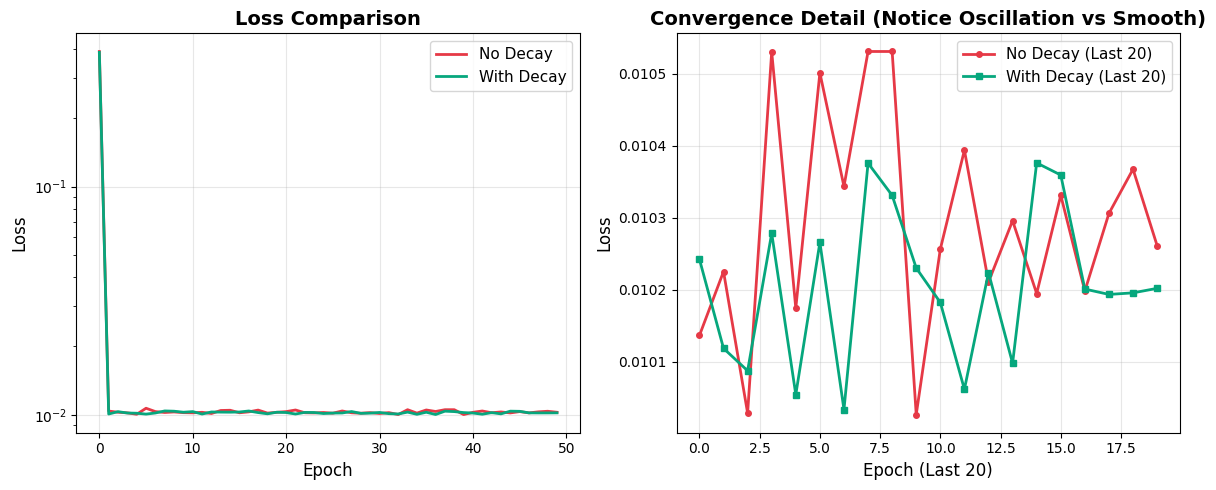

In [ ]:
"""
Mini-Batch Gradient Descent with Learning Rate Decay
Advanced optimizer implementation with multiple decay strategies.
Course: CS231n - Advanced Optimization
"""

import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Callable


class MiniBatchGDWithDecay:
    """
    Mini-batch GD with exponential learning rate decay.
    
    Learning rate schedule: lr_t = lr_0 * decay_rate^(t / decay_steps)
    
    Why Learning Rate Decay Helps:
    ────────────────────────────────
    Early training: Large steps explore the loss landscape quickly
    Late training:  Small steps fine-tune around the minimum
    
    Without decay: Oscillates around minimum, never settles
    With decay:    Converges smoothly to minimum
    
    Examples:
        # Basic usage
        optimizer = MiniBatchGDWithDecay(
            learning_rate=0.1,
            batch_size=32,
            decay_rate=0.96,
            decay_steps=100
        )
        
        # Train
        W = optimizer.fit(X, y, epochs=100)
    """
    
    def __init__(self,
                 learning_rate: float = 0.01,
                 batch_size: int = 32,
                 decay_rate: float = 0.96,
                 decay_steps: int = 100):
        """
        Initialize optimizer with learning rate decay.
        
        Args:
            learning_rate: Initial learning rate (lr_0)
            batch_size: Number of samples per batch
            decay_rate: Multiplicative decay factor (typically 0.9-0.99)
            decay_steps: Decay every N steps (not epochs!)
                - Steps = number of parameter updates
                - For dataset of N=1000, batch_size=32: ~31 steps/epoch
                - decay_steps=100 → decay roughly every 3 epochs
        
        Mathematical Formula:
            lr(t) = lr_0 * decay_rate^(t / decay_steps)
            
            Where t = number of optimization steps (not epochs)
        
        Design Note:
            We decay per STEP, not per EPOCH, because:
            - More fine-grained control
            - Independent of dataset size
            - Standard in modern frameworks (PyTorch, TensorFlow)
        """
        self.lr_initial = learning_rate
        self.lr_current = learning_rate
        self.batch_size = batch_size
        self.decay_rate = decay_rate
        self.decay_steps = decay_steps
        
        # Tracking
        self.step_count = 0
        self.loss_history = []
        self.lr_history = [learning_rate]
    
    def _update_learning_rate(self):
        """
        Update learning rate based on current step count.
        
        Formula: lr(t) = lr_0 * decay_rate^(t / decay_steps)
        
        Example:
            lr_0 = 0.1, decay_rate = 0.96, decay_steps = 100
            
            Step 0:   lr = 0.1 * 0.96^(0/100)   = 0.1
            Step 100: lr = 0.1 * 0.96^(100/100) = 0.096
            Step 200: lr = 0.1 * 0.96^(200/100) = 0.092
        """
        exponent = self.step_count / self.decay_steps
        self.lr_current = self.lr_initial * (self.decay_rate ** exponent)
        self.lr_history.append(self.lr_current)
    
    def compute_loss_and_gradient(self, 
                                   X: np.ndarray, 
                                   y: np.ndarray, 
                                   W: np.ndarray) -> Tuple[float, np.ndarray]:
        """
        Compute MSE loss and gradient.
        
        Loss: L(W) = (1/N) * Σ(X·W - y)²
        Gradient: ∇L = (2/N) * X^T·(X·W - y)
        
        Args:
            X: Input features (N, D)
            y: Target labels (N,)
            W: Current weights (D,)
        
        Returns:
            loss: Scalar MSE loss
            gradient: Gradient vector (D,)
        """
        N = X.shape[0]
        
        # Forward pass
        predictions = X.dot(W)
        errors = predictions - y
        
        # Loss (Mean Squared Error)
        loss = np.mean(errors ** 2)
        
        # Gradient: dL/dW = (2/N) * X^T * errors
        gradient = (2.0 / N) * X.T.dot(errors)
        
        return loss, gradient
    
    def fit(self, 
            X: np.ndarray, 
            y: np.ndarray, 
            epochs: int = 100,
            verbose: bool = True) -> np.ndarray:
        """
        Train using Mini-Batch GD with learning rate decay.
        
        Args:
            X: Training features (N, D)
            y: Training labels (N,)
            epochs: Number of complete passes through data
            verbose: Whether to print progress
        
        Returns:
            W: Optimized weights (D,)
        
        Training Loop Logic:
            For each epoch:
                1. Shuffle data (important!)
                2. For each batch:
                    a. Compute loss and gradient
                    b. Update weights: W = W - lr * grad
                    c. Decay learning rate
                3. Track epoch loss
        """
        N, D = X.shape
        W = np.zeros(D)  # Initialize weights
        
        if verbose:
            print("=" * 70)
            print(f"Training: N={N}, D={D}, batch_size={self.batch_size}")
            print(f"LR Schedule: lr_0={self.lr_initial:.4f}, "
                  f"decay_rate={self.decay_rate:.4f}, decay_steps={self.decay_steps}")
            print("=" * 70)
        
        for epoch in range(epochs):
            # Shuffle data each epoch (critical for good convergence!)
            indices = np.random.permutation(N)
            epoch_loss = 0
            num_batches = 0
            
            # Process mini-batches
            for start in range(0, N, self.batch_size):
                # Get batch
                batch_idx = indices[start:start + self.batch_size]
                X_batch = X[batch_idx]
                y_batch = y[batch_idx]
                
                # Compute loss and gradient
                loss, gradient = self.compute_loss_and_gradient(X_batch, y_batch, W)
                
                # Update weights: W = W - lr * ∇L
                W = W - self.lr_current * gradient
                
                # Increment step counter and update learning rate
                self.step_count += 1
                self._update_learning_rate()
                
                # Track metrics
                epoch_loss += loss
                num_batches += 1
            
            # Average loss over batches
            avg_loss = epoch_loss / num_batches
            self.loss_history.append(avg_loss)
            
            # Print progress
            if verbose and (epoch % 10 == 0 or epoch == epochs - 1):
                print(f"Epoch {epoch:3d} | "
                      f"Loss: {avg_loss:.6f} | "
                      f"LR: {self.lr_current:.6f} | "
                      f"Steps: {self.step_count}")
        
        if verbose:
            print("=" * 70)
            print(f"Training Complete!")
            print(f"Final Loss: {self.loss_history[-1]:.6f}")
            print(f"Final LR: {self.lr_current:.6f}")
        
        return W
    
    def plot_training(self):
        """
        Visualize training progress: loss curve and learning rate schedule.
        
        Creates two subplots:
        1. Loss vs Epoch (shows convergence)
        2. Learning Rate vs Step (shows decay schedule)
        """
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot 1: Loss curve
        ax1.plot(self.loss_history, linewidth=2, color='#2E86AB')
        ax1.set_xlabel('Epoch', fontsize=12)
        ax1.set_ylabel('Loss', fontsize=12)
        ax1.set_title('Training Loss (with LR Decay)', fontsize=14, fontweight='bold')
        ax1.grid(True, alpha=0.3)
        ax1.set_yscale('log')
        
        # Annotate final loss
        final_loss = self.loss_history[-1]
        ax1.annotate(f'Final: {final_loss:.6f}',
                    xy=(len(self.loss_history)-1, final_loss),
                    xytext=(-60, 20), textcoords='offset points',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        
        # Plot 2: Learning rate schedule
        ax2.plot(self.lr_history, linewidth=2, color='#A23B72')
        ax2.set_xlabel('Step', fontsize=12)
        ax2.set_ylabel('Learning Rate', fontsize=12)
        ax2.set_title('Learning Rate Decay Schedule', fontsize=14, fontweight='bold')
        ax2.grid(True, alpha=0.3)
        
        # Annotate decay points
        if len(self.lr_history) > self.decay_steps:
            decay_step = self.decay_steps
            decay_lr = self.lr_initial * self.decay_rate
            ax2.scatter([decay_step], [decay_lr], s=100, c='red', zorder=5)
            ax2.annotate('First Decay',
                        xy=(decay_step, decay_lr),
                        xytext=(20, -20), textcoords='offset points',
                        bbox=dict(boxstyle='round', facecolor='lightcoral', alpha=0.8),
                        arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
        
        plt.tight_layout()
        plt.savefig('lr_decay_training.png', dpi=150, bbox_inches='tight')
        print("\n📊 Plot saved as 'lr_decay_training.png'")
        plt.show()


# ============================================================================
# Comparison: With vs Without Learning Rate Decay
# ============================================================================

def compare_with_without_decay():
    """
    Compare training with and without learning rate decay.
    
    Demonstrates why LR decay is crucial for optimal convergence.
    """
    print("\n" + "=" * 70)
    print("COMPARISON: With vs Without Learning Rate Decay")
    print("=" * 70)
    
    # Generate synthetic data
    np.random.seed(42)
    N, D = 1000, 5
    X = np.random.randn(N, D)
    W_true = np.random.randn(D)
    y = X.dot(W_true) + 0.1 * np.random.randn(N)
    
    # Train WITHOUT decay (decay_rate = 1.0 means no decay)
    print("\n1. Training WITHOUT Learning Rate Decay:")
    print("-" * 70)
    optimizer_no_decay = MiniBatchGDWithDecay(
        learning_rate=0.1,
        batch_size=32,
        decay_rate=1.0,  # No decay!
        decay_steps=100
    )
    W_no_decay = optimizer_no_decay.fit(X, y, epochs=50, verbose=True)
    
    # Train WITH decay
    print("\n2. Training WITH Learning Rate Decay:")
    print("-" * 70)
    optimizer_with_decay = MiniBatchGDWithDecay(
        learning_rate=0.1,
        batch_size=32,
        decay_rate=0.96,  # Decay!
        decay_steps=100
    )
    W_with_decay = optimizer_with_decay.fit(X, y, epochs=50, verbose=True)
    
    # Compare results
    print("\n" + "=" * 70)
    print("RESULTS COMPARISON:")
    print("=" * 70)
    print(f"WITHOUT Decay - Final Loss: {optimizer_no_decay.loss_history[-1]:.6f}")
    print(f"WITH Decay    - Final Loss: {optimizer_with_decay.loss_history[-1]:.6f}")
    print(f"Improvement: {(1 - optimizer_with_decay.loss_history[-1] / optimizer_no_decay.loss_history[-1]) * 100:.2f}%")
    
    # Plot comparison
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(optimizer_no_decay.loss_history, label='No Decay', linewidth=2, color='#E63946')
    plt.plot(optimizer_with_decay.loss_history, label='With Decay', linewidth=2, color='#06A77D')
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Loss Comparison', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    plt.plot(optimizer_no_decay.loss_history[-20:], label='No Decay (Last 20)', 
             linewidth=2, color='#E63946', marker='o', markersize=4)
    plt.plot(optimizer_with_decay.loss_history[-20:], label='With Decay (Last 20)', 
             linewidth=2, color='#06A77D', marker='s', markersize=4)
    plt.xlabel('Epoch (Last 20)', fontsize=12)
    plt.ylabel('Loss', fontsize=12)
    plt.title('Convergence Detail (Notice Oscillation vs Smooth)', fontsize=14, fontweight='bold')
    plt.legend(fontsize=11)
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('decay_comparison.png', dpi=150, bbox_inches='tight')
    print("\n📊 Comparison plot saved as 'decay_comparison.png'")
    plt.show()


if __name__ == "__main__":
    compare_with_without_decay()

Without decay (constant LR):
Ball has constant energy
───────────────────────
Early: Fast movement (good!)
Late:  Bounces around valley bottom (bad!)
       ╱╲╱╲╱╲  ← Oscillates, never settles
```

**With decay (decreasing LR):**
```
Ball loses energy over time (friction)
──────────────────────────────────────
Early: Fast movement (explores landscape)
Late:  Slow, precise movement (settles in minimum)
       ────→ ✓ ← Smooth convergence
```

---

### **Mathematical Intuition**

**Loss landscape near minimum:**
```
L(W) ≈ L(W*) + (1/2) * (W - W*)^T * H * (W - W*)

Where:
- W* = optimal weights
- H = Hessian (curvature matrix)